## Importing libraries

## Contents
### Defining path variable
### Importing dataframes and checking shapes
### Checking for missing values in the imported dataframes
### Checking for duplicates in the imported dataframes
### Visualizing the busiest days of the week and busiest hour of the day
### Visualizing total customer expenditure by days of the week and hour of the day
### Visualizing frequency distribution accross loyalty flags
### Visualizing difference in user behaviour based on region
### Visualizing relationship between age and family status
### Visualising frequency and revenue generated from different price ranges
### Visualizing busiest days of week
### Visualizing busiest hours of day
### Visualising total customer expenditure by hour accross customer profiles
### Visualizing the most popular goods
### Visualizing user behavior based on income range
### Visualising distribution of loyalty flags among users

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Defining path variable

In [2]:
# defining path variable
path = r"C:\Users\khand\Desktop\Careerfoundry\Data Immersion\Achievement - 4\04-2022 Instacart Basket Analysis"

## Importing dataframes and checking shapes 

In [3]:
# importing original orders dataframe
df_ords = pd.read_csv(os.path.join(path, '2. Data', 'Original Data', 'orders.csv'), index_col = False)

In [5]:
# checking the shape of the imported dataframe
df_ords.shape

(3421083, 7)

In [6]:
# importing the orders dataframe after consistency checks
df_ords_checked = pd.read_csv(os.path.join(path, '2. Data', 'Prepared Data', 'Orders_checked.csv'), index_col = False)

In [7]:
# checking shape of the imported dataframe
df_ords_checked.shape

(3421083, 6)

In [8]:
# importing original products dataframe
df_prods = pd.read_csv(os.path.join(path, '2. Data', 'Original Data', 'products.csv'), index_col = False)

In [9]:
# checking the shape of the imported dataframe
df_prods.shape

(49693, 5)

In [10]:
# importing products dataframe after consitency checks
df_prods_checked = pd.read_csv(os.path.join(path, '2. Data', 'Prepared Data', 'Products_checked.csv'), index_col = False)

In [11]:
# checking the shape of the imported dataframe
df_prods_checked.shape

(49672, 5)

In [12]:
# importing the customers original dataframe
df_cust = pd.read_csv(os.path.join(path, '2. Data', 'Original Data', 'customers.csv'), index_col = False)

In [13]:
# checking the shape of the imported dataframe
df_cust.shape

(206209, 10)

In [16]:
# importing order_products_prior original dataframe
df_ords_prods_prior = pd.read_csv(os.path.join(path, '2. Data', 'Original Data', 'order_products_prior.csv'), index_col = False)

In [17]:
# checking the shape of the imported dataframe
df_ords_prods_prior.shape

(32434489, 4)

In [3]:
# importing the 4.10_final_dataframe
df_final = pd.read_pickle(os.path.join(path, '2. Data', 'Prepared Data', '4.10_final_dataframe.pkl'))

## Checking for missing values in the imported dataframes

In [19]:
# checking for missing values in "df_ords" dataframe
df_ords.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [20]:
# checking for missing values in "df_prods" dataframe
df_prods.isnull().sum()

product_id        0
product_name     16
aisle_id          0
department_id     0
prices            0
dtype: int64

In [21]:
# checking for missing values in the "df_cust" dataframe
df_cust.isnull().sum()

user_id             0
First Name      11259
Surnam              0
Gender              0
STATE               0
Age                 0
date_joined         0
n_dependants        0
fam_status          0
income              0
dtype: int64

In [22]:
# checking for missing values in the "df_ords_prods_prior" dataframe
df_ords_prods_prior.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

## Checking for duplicates in the imported dataframes

In [24]:
# checking for duplicates in the "df_ords" dataframe
df_ords.duplicated().sum()

0

In [25]:
# checking for duplicates in the "df_prods" dataframe
df_prods.duplicated().sum()

5

In [26]:
# checking for duplicates in the "df_ords_prods_prior" dataframe
df_ords_prods_prior.duplicated().sum()

0

In [27]:
# checking for duplicates in the "df_cust" dataframe
df_cust.duplicated().sum()

0

## Visualizing the busiest days of the week and busiest hour of the day

In [5]:
# Creating crosstab with relevant data
crosstab_day_time = pd.crosstab(index = df_final['order_time_24h_format'], columns = df_final['order_day'], values = df_final['order_day'], aggfunc = len, dropna = False).apply(lambda x : x/1000000)

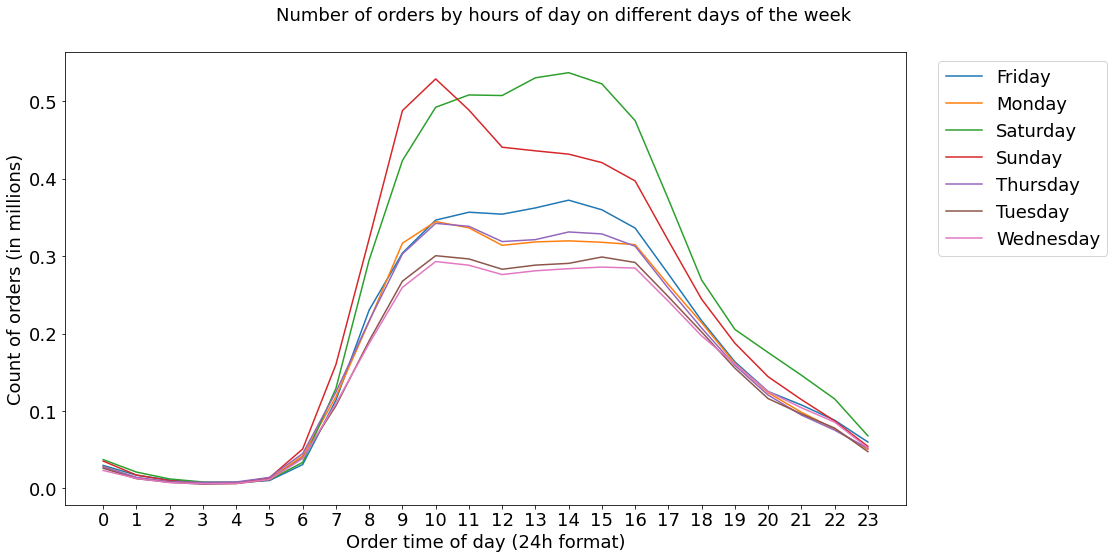

In [26]:
# creating lineplot to visualize busiest hours of day and busiest days of week
line_day_time = crosstab_day_time.plot(kind = 'line', xlabel = 'Order time of day (24h format)', ylabel = 'Count of orders (in millions)', figsize =(16,8))
plt.gcf().suptitle('Number of orders by hours of day on different days of the week', fontsize = 18)
plt.xticks(crosstab_day_time.index)
plt.legend(bbox_to_anchor = (1.25,1.0))
plt.rcParams.update({'font.size': 18})
plt.tight_layout()
plt.savefig(os.path.join(path, '4. Analysis', 'Visualization', '4.10 line_day_time.png'))

## Visualizing total customer expenditure by days of the week and hour of the day

In [27]:
# creating crosstab
crosstab_day_time_expenditure = pd.crosstab(index = df_final['order_time_24h_format'], columns = df_final['order_day'], values = df_final['prices'], aggfunc = sum, dropna = False).apply(lambda x : x/1000000)

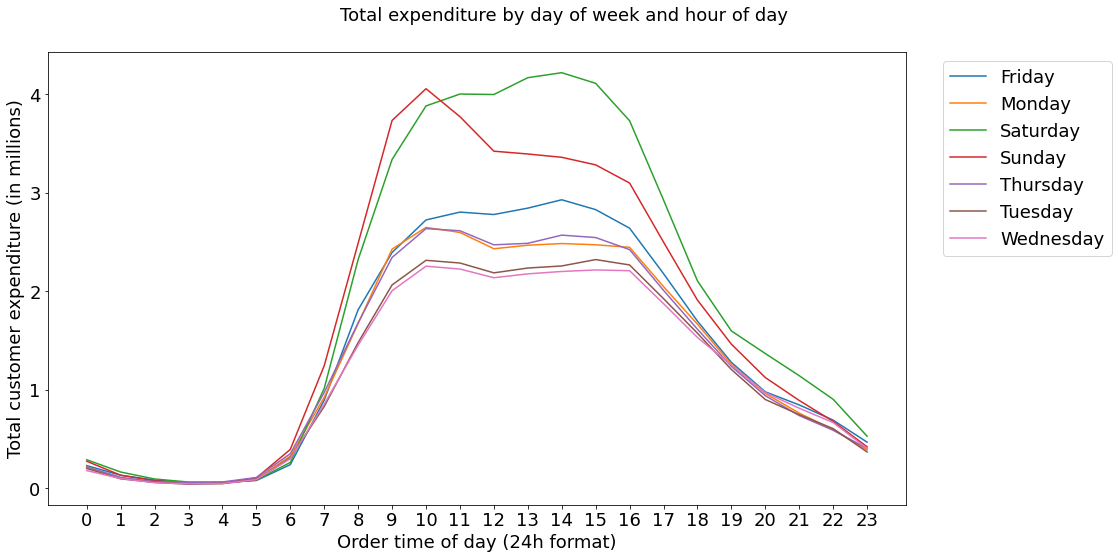

In [32]:
# creating lineplot visualising total customer expenditure by days of week and hour of day
line_day_time_exp = crosstab_day_time_expenditure.plot(kind = 'line', xlabel = 'Order time of day (24h format)', ylabel = 'Total customer expenditure (in millions)', figsize =(16,8))
plt.gcf().suptitle('Total expenditure by day of week and hour of day', fontsize = 18)
plt.legend(bbox_to_anchor = (1.25,1.0))
plt.xticks(crosstab_day_time_expenditure.index)
plt.tight_layout()
plt.savefig(os.path.join(path, '4. Analysis', 'Visualization', '4.10 line_exp_day_time.png'))

## Visualizing frequency and expenditure by loyalty flag and income range

In [10]:
# creating dataframe with required data
df_loyalty_income = df_final.groupby(['loyalty_flag', 'income_range']).agg({'prices' : ['sum'], 'max_orders' : ['mean'], 'median_of_days_since_prior_order' : ['mean']}).reset_index()
df_loyalty_income = df_loyalty_income.droplevel(1, axis = 1)
df_loyalty_income['prices'] = df_loyalty_income['prices'].apply(lambda x : x/1000000)                                                                            

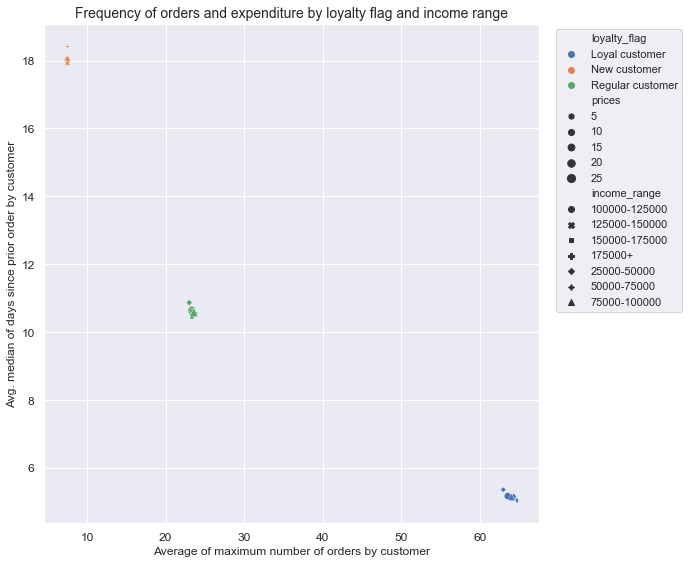

In [23]:
# creating scatterplot
scatter_loyalty_income = sns.scatterplot(data = df_loyalty_income, x = 'max_orders', y = 'median_of_days_since_prior_order', style = 'income_range', hue = 'loyalty_flag', size = 'prices')
scatter_loyalty_income.legend(bbox_to_anchor = (1.3,1.0))
scatter_loyalty_income.set_title('Frequency of orders and expenditure by loyalty flag and income range', fontsize = 14)
scatter_loyalty_income.set_xlabel('Average of maximum number of orders by customer', fontsize = 12)
scatter_loyalty_income.set_ylabel('Avg. median of days since prior order by customer', fontsize = 12)
scatter_loyalty_income.tick_params(labelsize = 12)
sns.set(rc={'figure.figsize':(10,8)})
plt.tight_layout()
plt.savefig(os.path.join(path, '4. Analysis', 'Visualization', '4.10 scatter_loyalty_income.png'))

### Checking column names, datatypes and number of rows and columns

In [9]:
# checking column names, datatypes and number of rows and columns
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 32404858
Data columns (total 44 columns):
 #   Column                            Dtype   
---  ------                            -----   
 0   order_id                          object  
 1   user_id                           object  
 2   order_number                      int64   
 3   order_day_of_week                 int32   
 4   order_time_24h_format             int32   
 5   days_since_prior_order            float64 
 6   product_id                        object  
 7   add_to_cart_order                 int64   
 8   reordered                         int64   
 9   merge_flag_1                      category
 10  product_name                      object  
 11  aisle_id                          object  
 12  department_id                     object  
 13  prices                            float64 
 14  merge_flag_2                      category
 15  price_range                       object  
 16  busiest_day     

## Visualizing frequency distribution accross loyalty flags

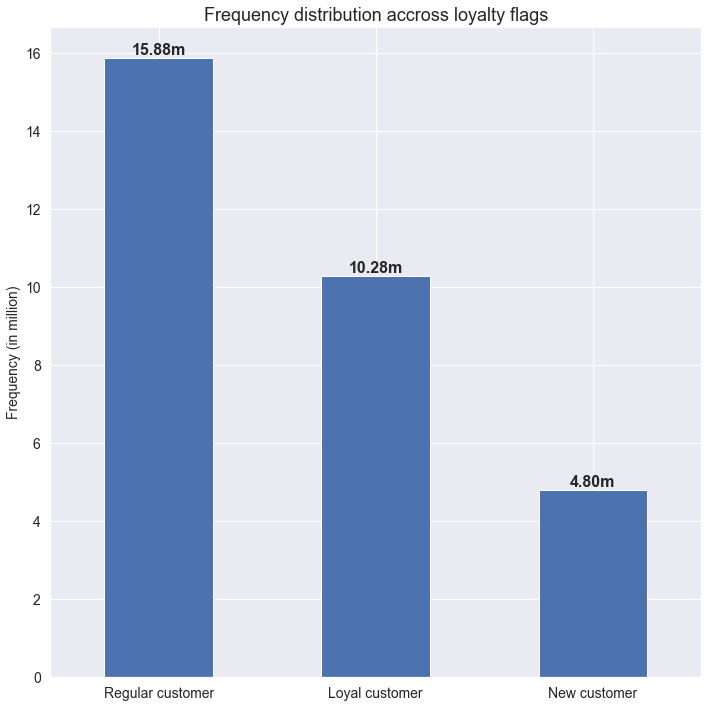

In [81]:
# creating bar char visualising frequency distribution of 'loyalty_flag' column
bar_loyalty = df_final['loyalty_flag'].value_counts(dropna = False).apply(lambda x : x/1000000).plot(kind = 'bar', xlabel = '', figsize = (10,10))
plt.title('Frequency distribution accross loyalty flags', fontsize = 18)
plt.ylabel('Frequency (in million)', fontsize = 14)
plt.xticks(rotation = False)
plt.tick_params(labelsize = 14)
for c in bar_loyalty.containers :
    plt.bar_label(c, fmt = '%0.2fm', fontsize = 16, fontweight = 'bold')
plt.tight_layout()
plt.savefig(os.path.join(path, '4. Analysis', 'Visualization', '4.10. bar_loyalty.png'))

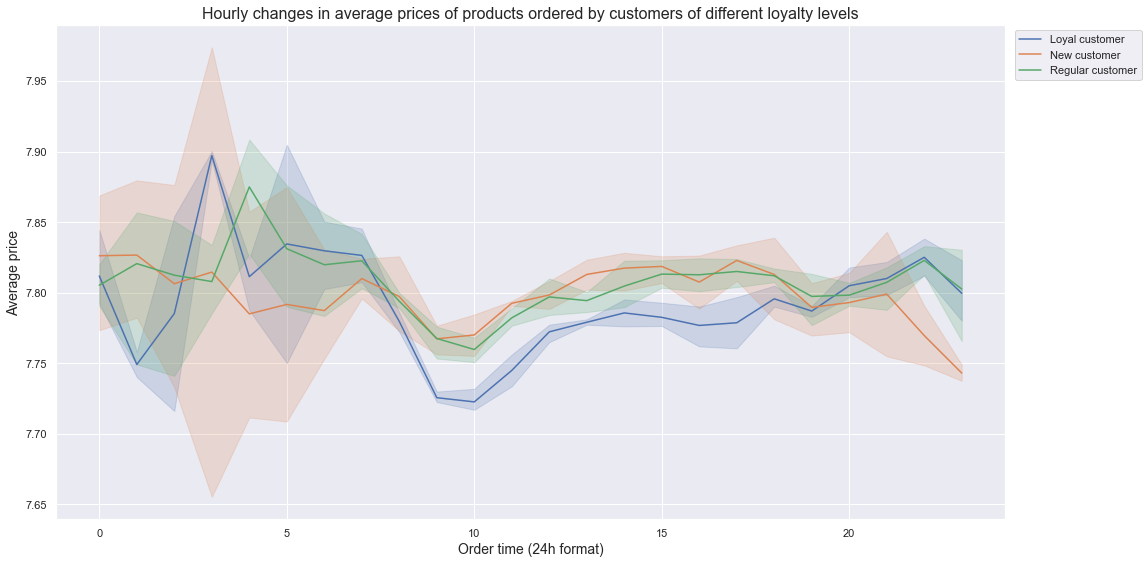

In [62]:
# creating line plot visualising hourly changes in average prices of products ordered accross loyalty flags
line_region_time = sns.lineplot(data = df_region_loyalty, x = 'order_time_24h_format', y = 'prices', hue = 'loyalty_flag')
line_region_time.set_title('Hourly changes in average prices of products ordered by customers of different loyalty levels', fontsize = 16)
line_region_time.set_xlabel('Order time (24h format)', fontsize = 14)
line_region_time.set_ylabel('Average price', fontsize = 14)
line_region_time.legend(bbox_to_anchor = (1.15,1.0))
sns.set(rc={'figure.figsize':(16,8)})
plt.tight_layout()
plt.savefig(os.path.join(path, '4. Analysis', 'Visualization', '4.10 line_region_time_loyalty.png'))

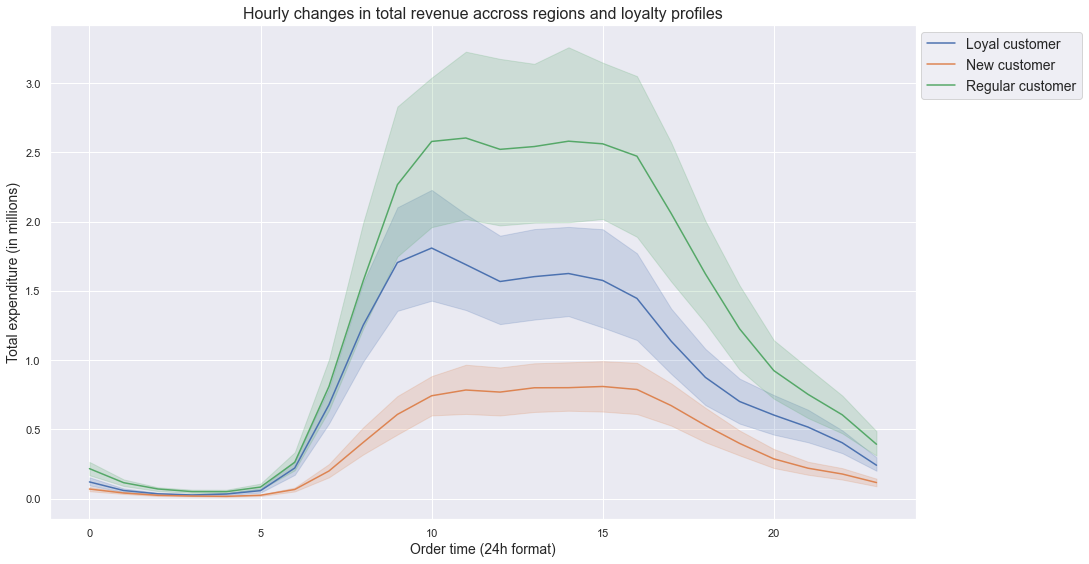

In [175]:
# creating line plot visualising hourly changes in total revenue accross loylty flags
line_region_loyalty_rev = sns.lineplot(data = df_reg_loyalty_rev, x = 'order_time_24h_format', y = 'prices', hue = 'loyalty_flag')
line_region_loyalty_rev.set_title('Hourly changes in total revenue accross regions and loyalty profiles', fontsize = 16)
line_region_loyalty_rev.set_xlabel('Order time (24h format)', fontsize = 14)
line_region_loyalty_rev.set_ylabel('Total expenditure (in millions)', fontsize = 14)
line_region_loyalty_rev.legend(bbox_to_anchor = (1.2, 1.0), fontsize = 14)
sns.set(rc={'figure.figsize':(16,8)})
plt.tight_layout()
plt.subplots_adjust(right = 0.80)
plt.savefig(os.path.join(path, '4. Analysis', 'Visualization', '4.10 line_time_loyalty_exp.png'))

## Visualizing difference in user behaviour based on region

In [4]:
# creating dataframe with relevant columns and aggregations
df_region_loyalty = df_final.groupby(['region', 'loyalty_flag', 'order_time_24h_format']).agg({'prices': ['mean'], 'median_of_days_since_prior_order' : ['mean']}).reset_index()
df_region_loyalty = df_region_loyalty.droplevel(1, axis = 1)


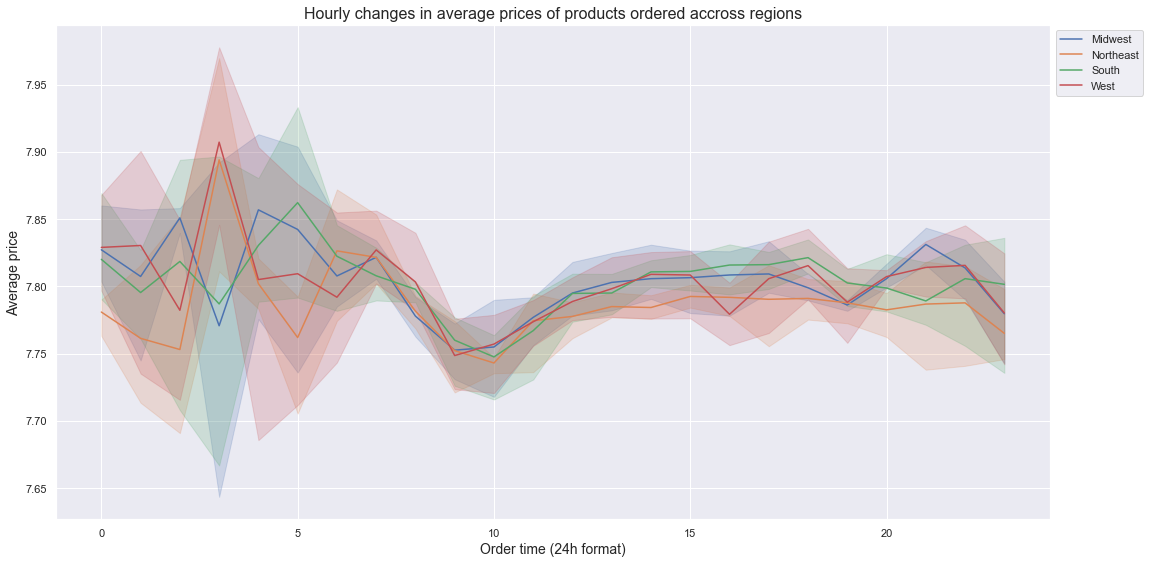

In [6]:
# creating line plot visualising hourly changes in average prices of products ordered accross regions
line_region_time = sns.lineplot(data = df_region_loyalty, x = 'order_time_24h_format', y = 'prices', hue = 'region')
line_region_time.set_title('Hourly changes in average prices of products ordered accross regions', fontsize = 16)
line_region_time.set_xlabel('Order time (24h format)', fontsize = 14)
line_region_time.set_ylabel('Average price', fontsize = 14)
line_region_time.legend(bbox_to_anchor = (1.1,1.0))
plt.tight_layout()
sns.set(rc={'figure.figsize':(16,8)})
plt.savefig(os.path.join(path, '4. Analysis', 'Visualization', '4.10 line_region_time.png'))

In [171]:
#creaing new dataframe with relevant data
df_reg_loyalty_rev = df_final.groupby(['region', 'loyalty_flag', 'order_time_24h_format']).agg({'prices': ['sum']}).reset_index()
df_reg_loyalty_rev = df_reg_loyalty_rev.droplevel(1, axis = 1)
df_reg_loyalty_rev['prices'] = df_reg_loyalty_rev['prices'].apply(lambda x : x/1000000)

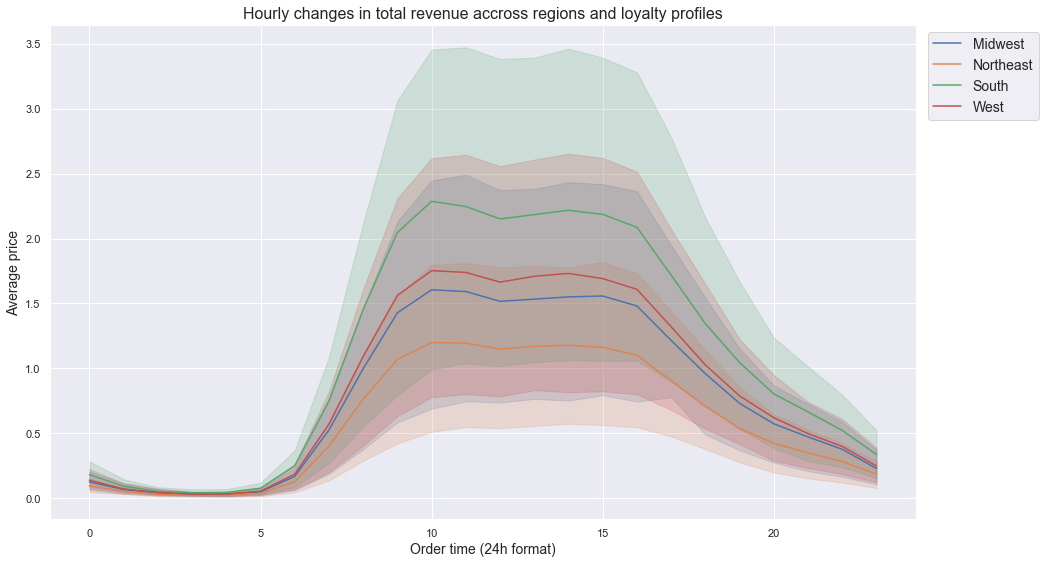

In [98]:
# creating line plot visualising hourly changes in total revenue accross regions
line_region_loyalty_rev = sns.lineplot(data = df_reg_loyalty_rev, x = 'order_time_24h_format', y = 'prices', hue = 'region')
line_region_loyalty_rev.set_title('Hourly changes in total revenue accross regions and loyalty profiles', fontsize = 16)
line_region_loyalty_rev.set_xlabel('Order time (24h format)', fontsize = 14)
line_region_loyalty_rev.set_ylabel('Average price', fontsize = 14)
line_region_loyalty_rev.legend(bbox_to_anchor = (1.15,1.0), fontsize = 14)
sns.set(rc={'figure.figsize':(16,8)})
plt.tight_layout()
plt.subplots_adjust(right = 0.8)
plt.savefig(os.path.join(path, '4. Analysis', 'Visualization', '4.10 line_region_time_loyalty_exp.png'))

## Visualizing relationship between age and family status

In [46]:
# creating new dataframe with relevant data and aggreagation
df_age_family = df_final.groupby(['age', 'family_status']).agg({'order_id' : 'count'}).reset_index()
df_age_family.columns = ['age', 'family_status', 'frequency']
df_age_family['frequency'] = df_age_family['frequency'].apply(lambda x : x/1000)

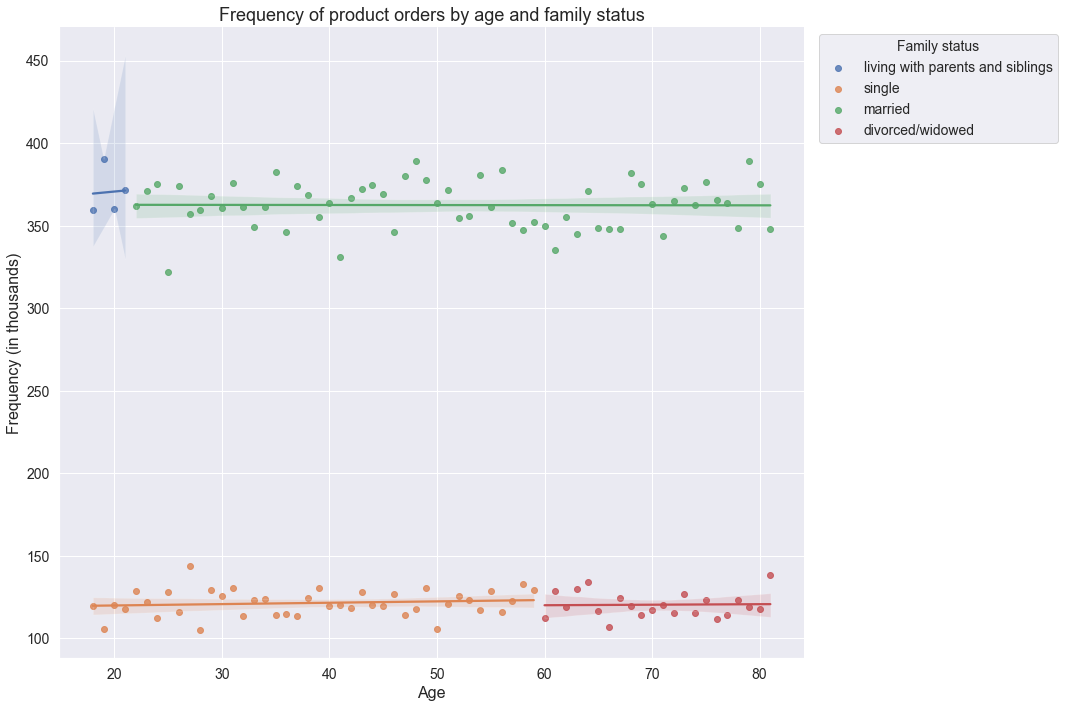

In [15]:
# scatterplot of frequency of product orders by age and family status
scatter_age_family = sns.lmplot(data = df_age_family, x = 'age', y = 'frequency', legend = False, hue = 'family_status', height = 10, aspect = 1.5)
plt.title('Frequency of product orders by age and family status', fontsize = 18)
plt.xlabel('Age', fontsize = 16)
plt.ylabel('Frequency (in thousands)', fontsize = 16)
plt.tick_params('both', labelsize = 14)
plt.legend(title = 'Family status', bbox_to_anchor = (1.35,1.0), fontsize = 14, title_fontsize = 14)
plt.tight_layout()
plt.subplots_adjust(right = 0.75)
plt.savefig(os.path.join(path, '4. Analysis', 'Visualization', '4.10 scatter_age_family_status.png'))

## Visualising frequency and revenue generated from different price ranges

In [139]:
# creating dataframe with requeired data and aggregation
df_day_pricerange = df_final.groupby(['order_day_of_week', 'order_day', 'price_range']).agg({'order_id': ['count'], 'prices' : ['sum']}).reset_index()
df_day_pricerange[['prices', 'order_id']] = df_day_pricerange[['prices', 'order_id']].apply(lambda x : x/1000000)
df_day_pricerange.columns = ['order_day_of_week', 'order_day', 'price_range', 'frequency', 'total_revenue']

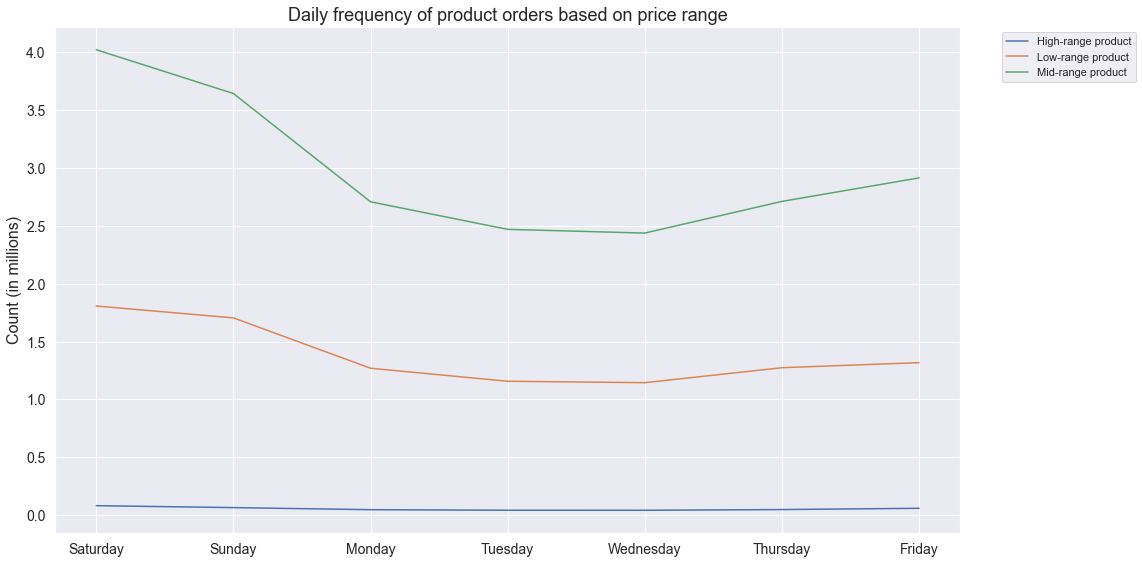

In [154]:
# creating a lineplot visualizing daily product order frequency by price range
line_day_price_range = sns.lineplot(data = df_day_pricerange, x = 'order_day', y = 'frequency', hue = 'price_range')
line_day_price_range.set_title('Daily frequency of product orders based on price range', fontsize = 18)
line_day_price_range.set_xlabel('')
line_day_price_range.set_ylabel('Count (in millions)', fontsize = 16)
line_day_price_range.tick_params(labelsize = 14)
line_day_price_range.legend(bbox_to_anchor = (1.2,1.0), fontsize = 14)
plt.tight_layout()
plt.savefig(os.path.join(path, '4. Analysis', 'Visualization', '4.10 line_day_price_range.png'))

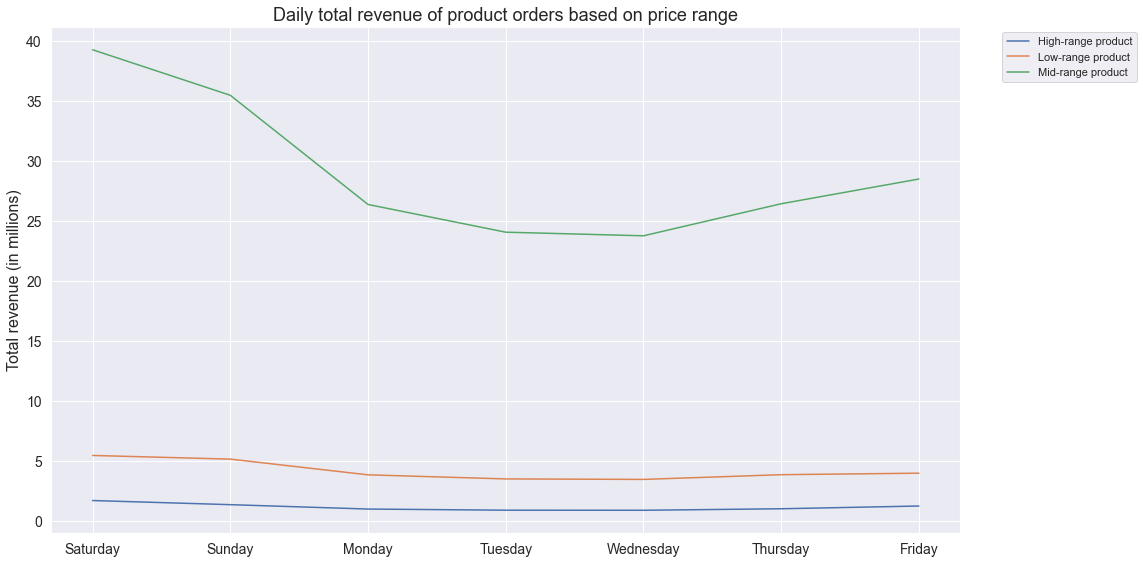

In [155]:
# creating a lineplot visualizing daily ptotal revenue by price range
line_day_price_range = sns.lineplot(data = df_day_pricerange, x = 'order_day', y = 'total_revenue', hue = 'price_range')
line_day_price_range.set_title('Daily total revenue of product orders based on price range', fontsize = 18)
line_day_price_range.set_xlabel('')
line_day_price_range.set_ylabel('Total revenue (in millions)', fontsize = 16)
line_day_price_range.tick_params(labelsize = 14)
line_day_price_range.legend(bbox_to_anchor = (1.2,1.0))
plt.tight_layout()
plt.savefig(os.path.join(path, '4. Analysis', 'Visualization', '4.10 line_day_price_range_revenue.png'))

In [52]:
# creating dataframe with requeired data and aggregation
df_time_pricerange = df_final.groupby(['order_time_24h_format', 'price_range']).agg({'order_id': ['count'], 'prices' : ['sum']}).reset_index()
df_time_pricerange[['prices', 'order_id']] = df_time_pricerange[['prices', 'order_id']].apply(lambda x : x/1000000)
df_time_pricerange.columns = ['order_time_24h_format', 'price_range', 'frequency', 'total_revenue']

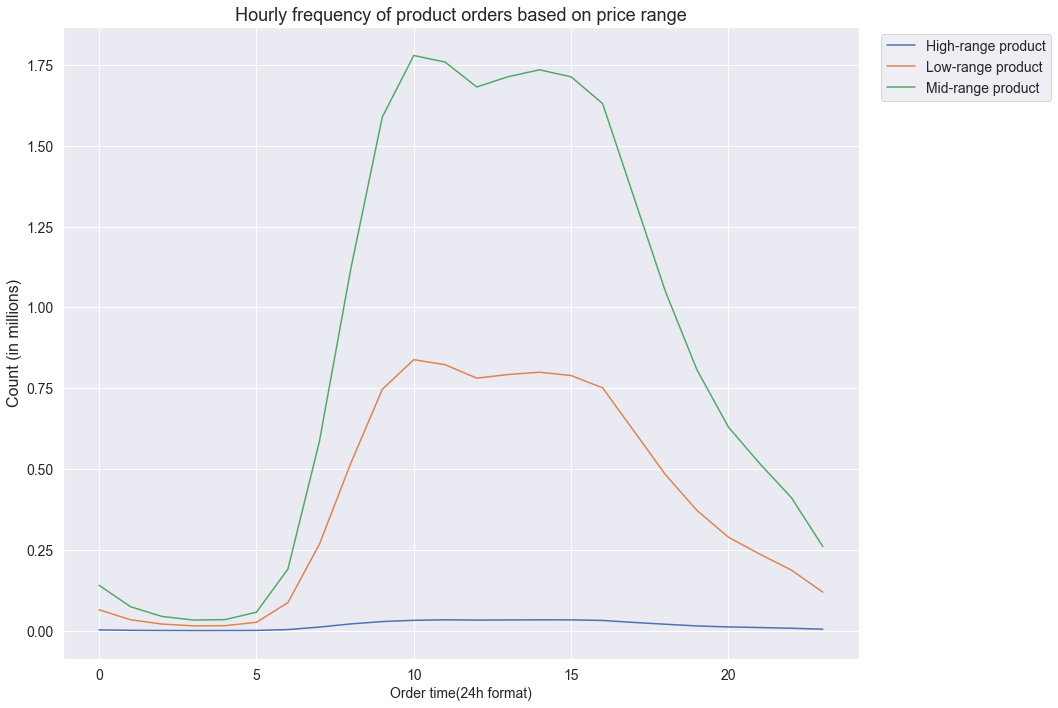

In [67]:
# creating a lineplot visualizing hourly product order frequency by price range
line_time_price_range = sns.lineplot(data = df_time_pricerange, x = 'order_time_24h_format', y = 'frequency', hue = 'price_range')
line_time_price_range.set_title('Hourly frequency of product orders based on price range', fontsize = 18)
line_time_price_range.set_xlabel('Order time(24h format)', fontsize = 14)
line_time_price_range.set_ylabel('Count (in millions)', fontsize = 16)
line_time_price_range.tick_params(labelsize = 14)
line_time_price_range.legend(bbox_to_anchor = (1.25,1.0), fontsize = 14)
plt.tight_layout()
plt.savefig(os.path.join(path, '4. Analysis', 'Visualization', '4.10 line_time_price_range.png'))

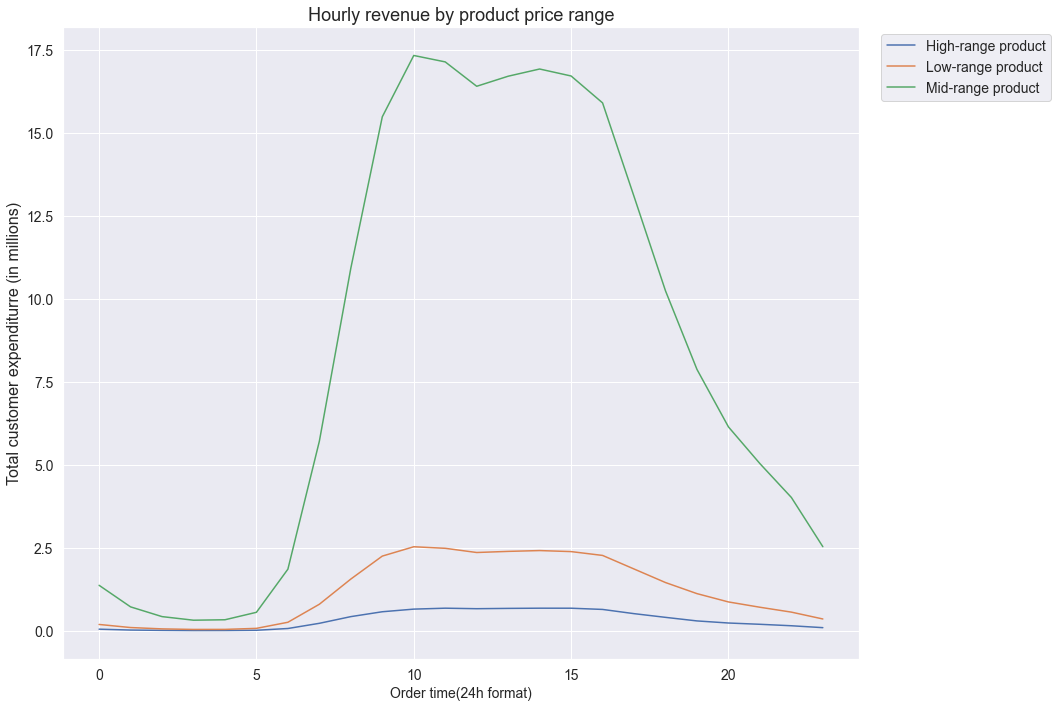

In [68]:
# creating a lineplot visualizing hourly revenue by price range
line_time_price_range = sns.lineplot(data = df_time_pricerange, x = 'order_time_24h_format', y = 'total_revenue', hue = 'price_range')
line_time_price_range.set_title('Hourly revenue by product price range', fontsize = 18)
line_time_price_range.set_xlabel('Order time(24h format)', fontsize = 14)
line_time_price_range.set_ylabel('Total customer expenditurre (in millions)', fontsize = 16)
line_time_price_range.tick_params(labelsize = 14)
line_time_price_range.legend(bbox_to_anchor = (1.25,1.0), fontsize = 14)
plt.tight_layout()
plt.savefig(os.path.join(path, '4. Analysis', 'Visualization', '4.10 line_time_price_range_exp.png'))

## Visualizing busiest days of week

In [7]:
# creating dataframe with relevant data and aggregation
df_day_prof = pd.DataFrame(df_final.groupby(['order_day_of_week', 'order_day', 'order_time_24h_format', 'combined_customer_profile', 'region', 'family_status', 'income_range', 'loyalty_flag', 'frequency_flag']).agg({'prices' : ['mean'], 'order_id' : ['count']}).reset_index())
df_day_prof.columns = ['order_day_of_week', 'order_day', 'order_time_24h_format', 'combined_customer_profile', 'region', 'family_status', 'income_range', 'loyalty_flag', 'frequency_flag', 'avg_prices', 'frequency']
df_day_prof['frequency'] = df_day_prof['frequency'].apply(lambda x : x/1000)

In [5]:
# creating crosstab with relevant data
crosstab_day_prof = pd.crosstab(index = df_day_prof['order_day_of_week'], columns = df_day_prof['combined_customer_profile'], values = df_day_prof['frequency'], aggfunc = 'sum', dropna = False)

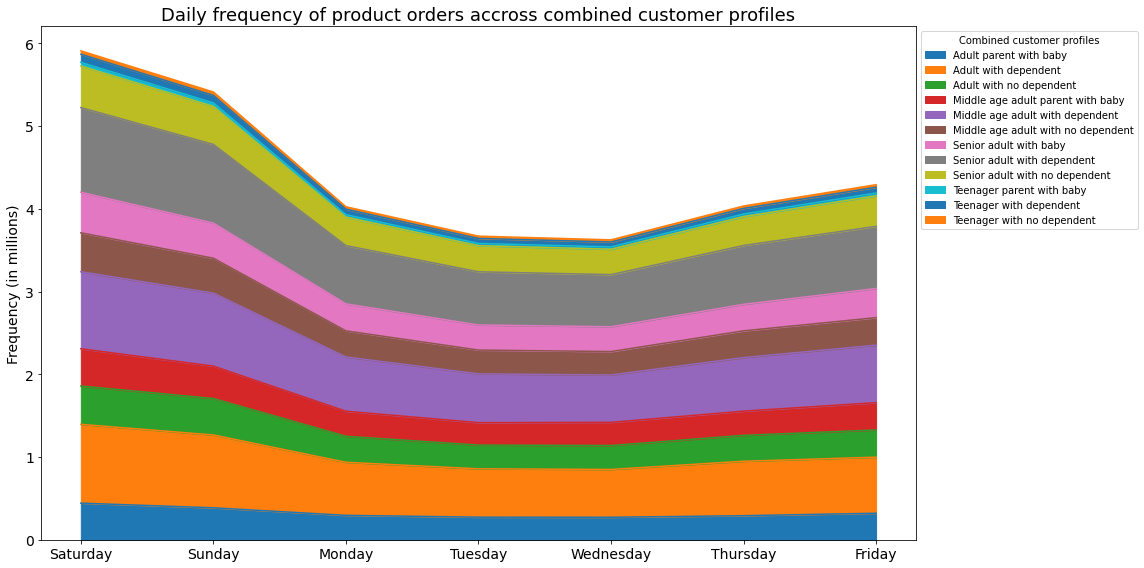

In [8]:
# creating area chart visualizing busiest days based on combined customer profiles
area_day_prof = crosstab_day_prof.plot(kind = 'area', xlabel = '', figsize = (16,8))
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.title('Daily frequency of product orders accross combined customer profiles', fontsize = 18)
plt.ylabel('Frequency (in millions)', fontsize = 14)
plt.legend(bbox_to_anchor = (1.0,1.0), title = 'Combined customer profiles')
plt.tick_params(labelsize = 14)
plt.tight_layout()
plt.savefig(os.path.join(path, '4. Analysis', 'Visualization', '4.10 area_day_prof.png'))

## Visualizing busiest hours of day

In [48]:
# creating crosstab with relevant data
crosstab_hour_prof = pd.crosstab(index = df_day_prof['order_time_24h_format'], columns = df_day_prof['combined_customer_profile'], values = df_day_prof['frequency'], aggfunc = 'sum', dropna = False)

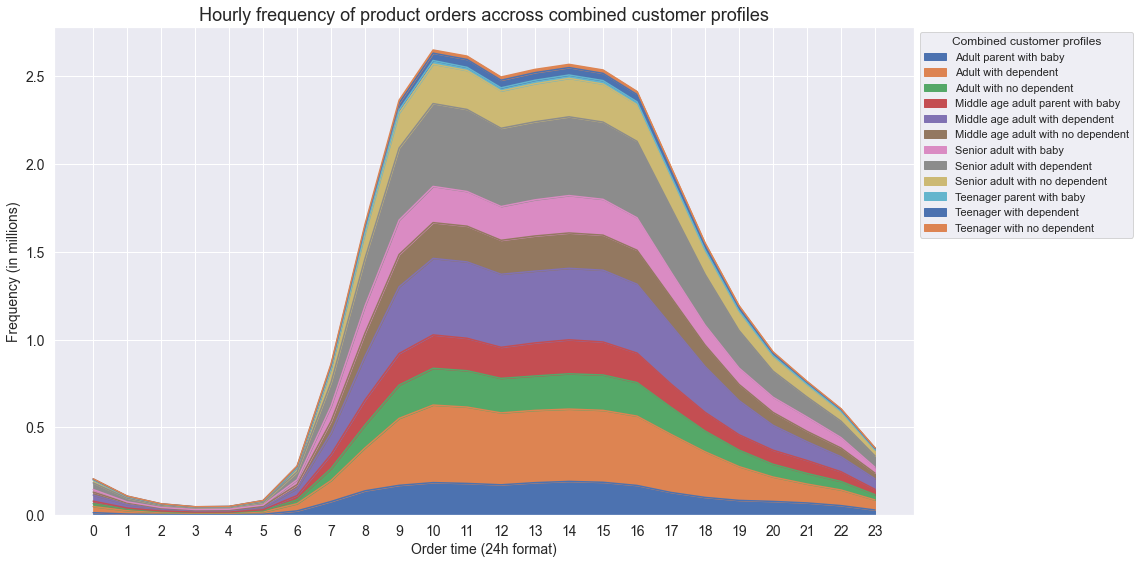

In [50]:
# creating area chart visualizing busiest days based on combined customer profiles
area_day_prof = crosstab_day_prof.plot(kind = 'area', figsize = (16,8))
plt.xticks(crosstab_hour_prof.index)
plt.title('Hourly frequency of product orders accross combined customer profiles', fontsize = 18)
plt.xlabel('Order time (24h format)', fontsize = 14)
plt.ylabel('Frequency (in millions)', fontsize = 14)
plt.legend(bbox_to_anchor = (1.0,1.0), title = 'Combined customer profiles')
plt.tick_params(labelsize = 14)
plt.tight_layout()
plt.savefig(os.path.join(path, '4. Analysis', 'Visualization', '4.10 area_hour_prof.png'))

## Visualising total customer expenditure by hour accross customer profiles

In [160]:
# creating dataframe with relevant data and aggregation
df_day_prof_exp = pd.DataFrame(df_final.groupby(['order_day_of_week', 'order_day', 'order_time_24h_format', 'combined_customer_profile', 'region', 'family_status', 'income_range', 'age']).agg({'prices' : ['sum'], 'order_id' : ['count']}).reset_index())
df_day_prof_exp.columns = ['order_day_of_week', 'order_day', 'order_time_24h_format', 'combined_customer_profile', 'region', 'family_status', 'income_range', 'age','total_expenditure', 'frequency']
df_day_prof_exp[['total_expenditure', 'frequency']] = df_day_prof_exp[['total_expenditure', 'frequency']].apply(lambda x : x/1000000)

In [6]:
# creating cross tab with relevant data
crosstab_prof_exp = pd.crosstab(index = df_day_prof_exp['order_time_24h_format'], columns = df_day_prof_exp['combined_customer_profile'], values = df_day_prof_exp['total_expenditure'], aggfunc = sum, dropna = False)

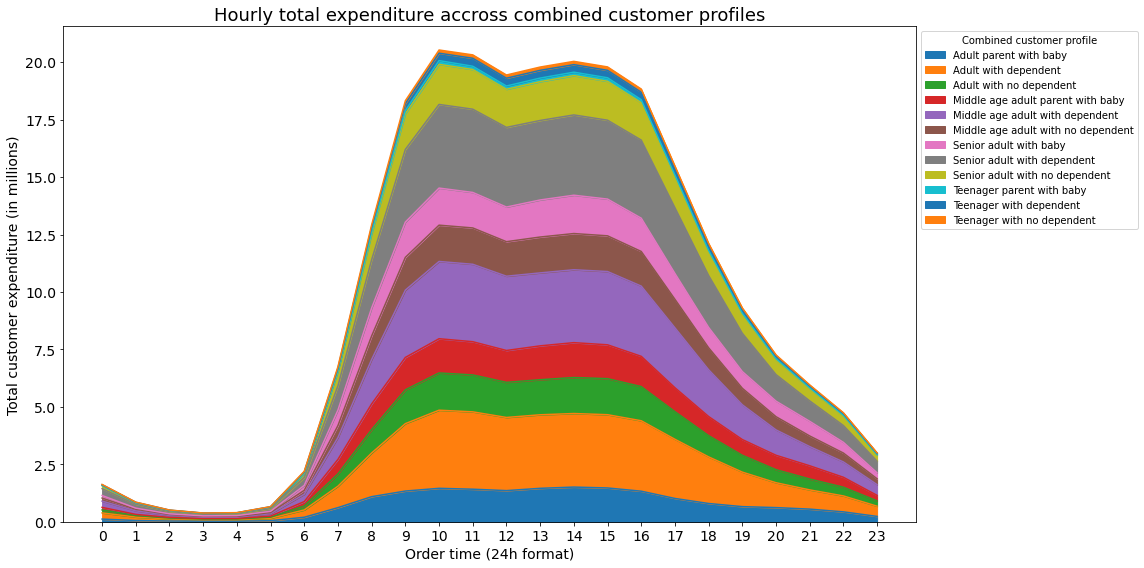

In [8]:
# creating area chart visualizing total expenditure by hour
area_time_prof_exp = crosstab_prof_exp.plot(kind = 'area', figsize = (16,8))
plt.title('Hourly total expenditure accross combined customer profiles', fontsize = 18)
plt.xlabel('Order time (24h format)', fontsize = 14)
plt.ylabel('Total customer expenditure (in millions)', fontsize = 14)
plt.xticks(crosstab_prof_exp.index)
plt.tick_params(labelsize = 14)
plt.legend(title = 'Combined customer profile', bbox_to_anchor = (1.0,1.0))
plt.tight_layout()
plt.savefig(os.path.join(path, '4. Analysis', 'Visualization', '4.10 area_time_prof_exp.png'))

## Visualizing the most popular goods 

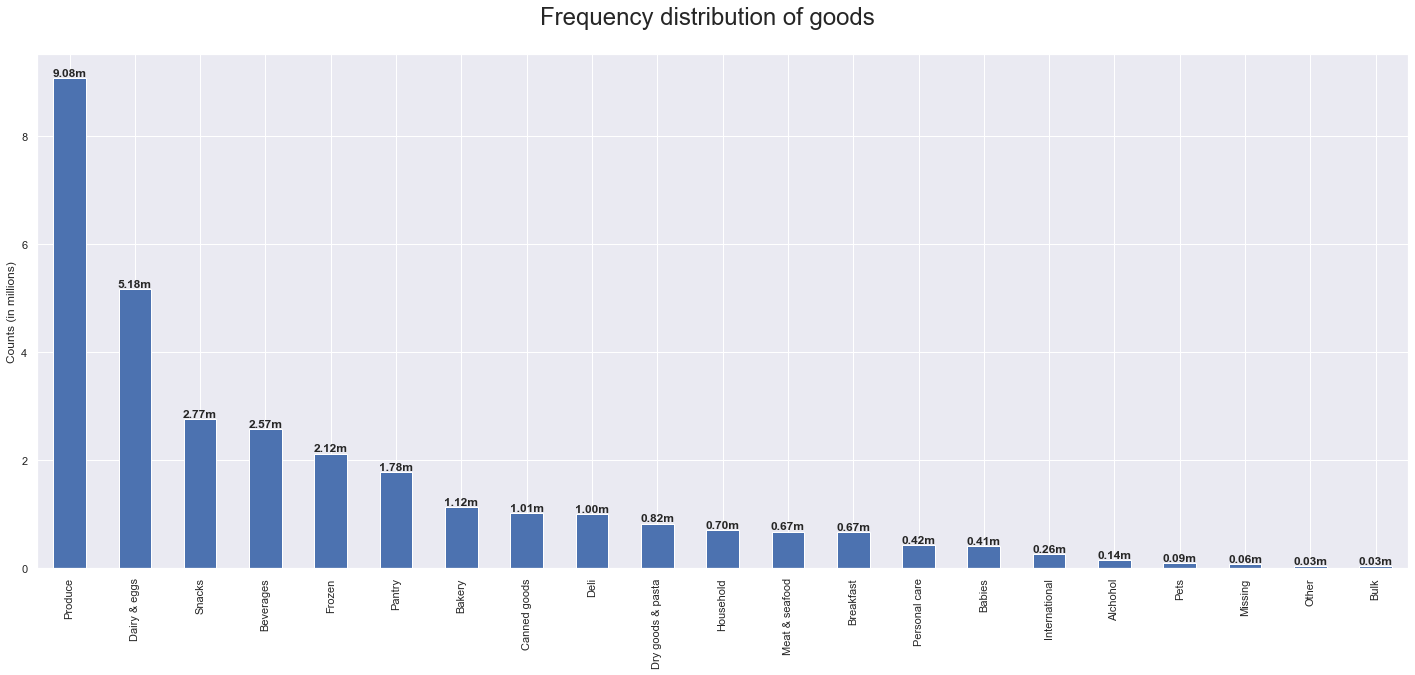

In [62]:
# creating bar chart based on frequency of product orders by goods/department
bar_goods = df_final['name_of_goods'].value_counts(dropna = False).apply(lambda x : x/1000000).plot(kind = 'bar', ylabel = 'Counts (in millions)', figsize = (20,10))
for c in bar_goods.containers :
    plt.bar_label(c, fmt = '%0.2fm', fontsize = 12, fontweight = 'bold')
plt.gcf().suptitle('Frequency distribution of goods', fontsize = 24)
plt.rcParams.update({'font.size': 18})
plt.tight_layout()
plt.subplots_adjust(bottom = 0.2)
plt.savefig(os.path.join(path, '4. Analysis', 'Visualization', '4.10 bar_goods.png'))

## Visualizing user behavior based on income range

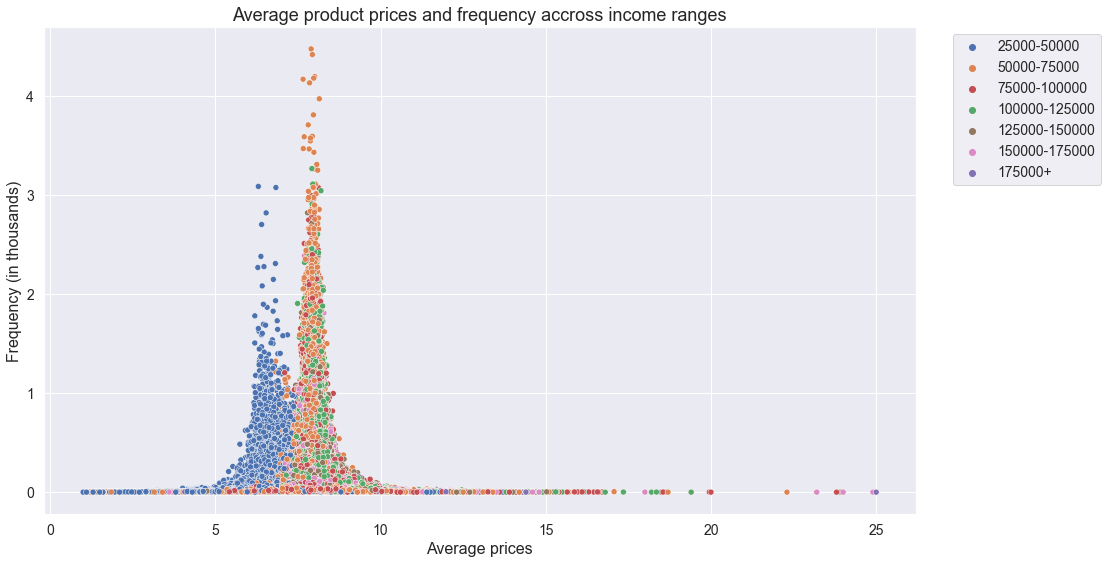

In [8]:
# scatterplot visualizing pattern in customer orders based on frequency and average price
scatter_freq_exp = sns.scatterplot(data = df_day_prof, x = 'avg_prices', y = 'frequency', hue = 'income_range')
plt.title('Average product prices and frequency accross income ranges', fontsize = 18)
plt.xlabel('Average prices', fontsize = 16)
plt.ylabel('Frequency (in thousands)', fontsize = 16)
plt.tick_params(labelsize = 14)
#ordering legends
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,3,2,5,6,4]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], bbox_to_anchor = (1.22,1.0), fontsize = 14)
#setting size of figure
#alternative way : plt.figure(figsize = (15,10))
sns.set(rc={'figure.figsize':(15,10)})
plt.tight_layout()
plt.subplots_adjust(right = 0.80)
plt.savefig(os.path.join(path, '4. Analysis', 'Visualization', '4.10 scatter_freq_exp_income.png'))

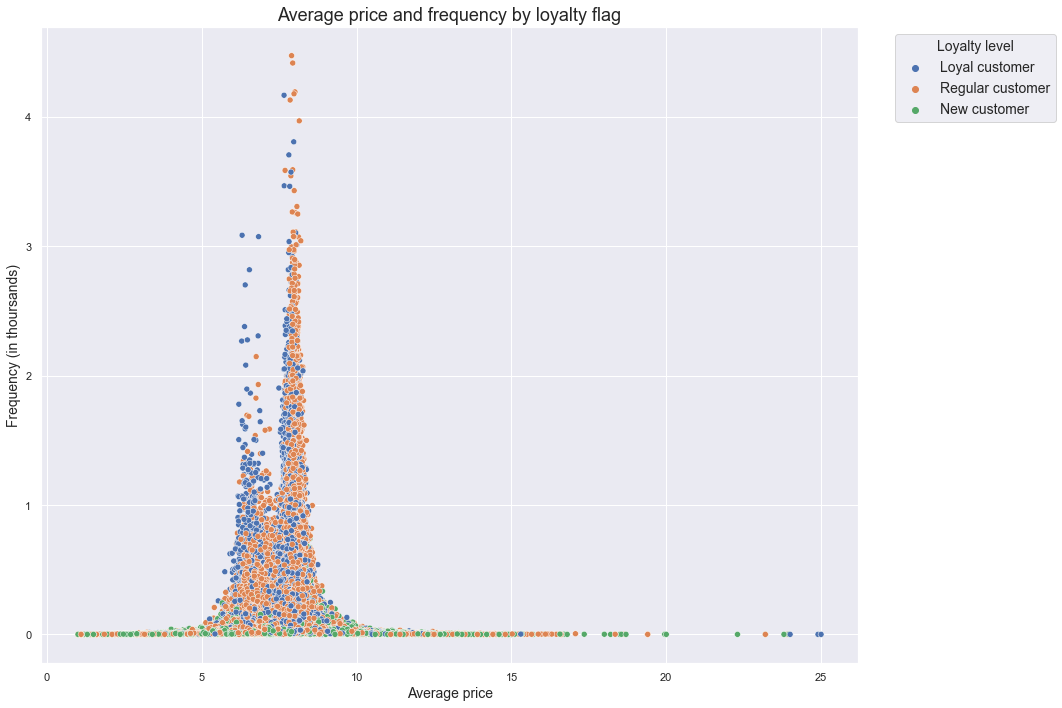

In [42]:
# scatterplot visualizing pattern in customer orders based on frequency and average price
scatter_loyalty_freq_price = sns.scatterplot(data = df_day_prof, x = 'avg_prices', y = 'frequency', hue = 'loyalty_flag')
plt.legend(title = 'Loyalty level', title_fontsize = 14, fontsize = 14, bbox_to_anchor = (1.25, 1.0))
plt.title('Average price and frequency by loyalty flag', fontsize = 18)
plt.xlabel('Average price', fontsize = 14)
plt.ylabel('Frequency (in thoursands)', fontsize = 14)
sns.set(rc = {'figure.figsize' : (15,10)})
plt.tight_layout()
plt.subplots_adjust(right = 0.8)
plt.savefig(os.path.join(path, '4. Analysis', 'Visualization', '4.10 scatter_freq_price_loyalty.png'))

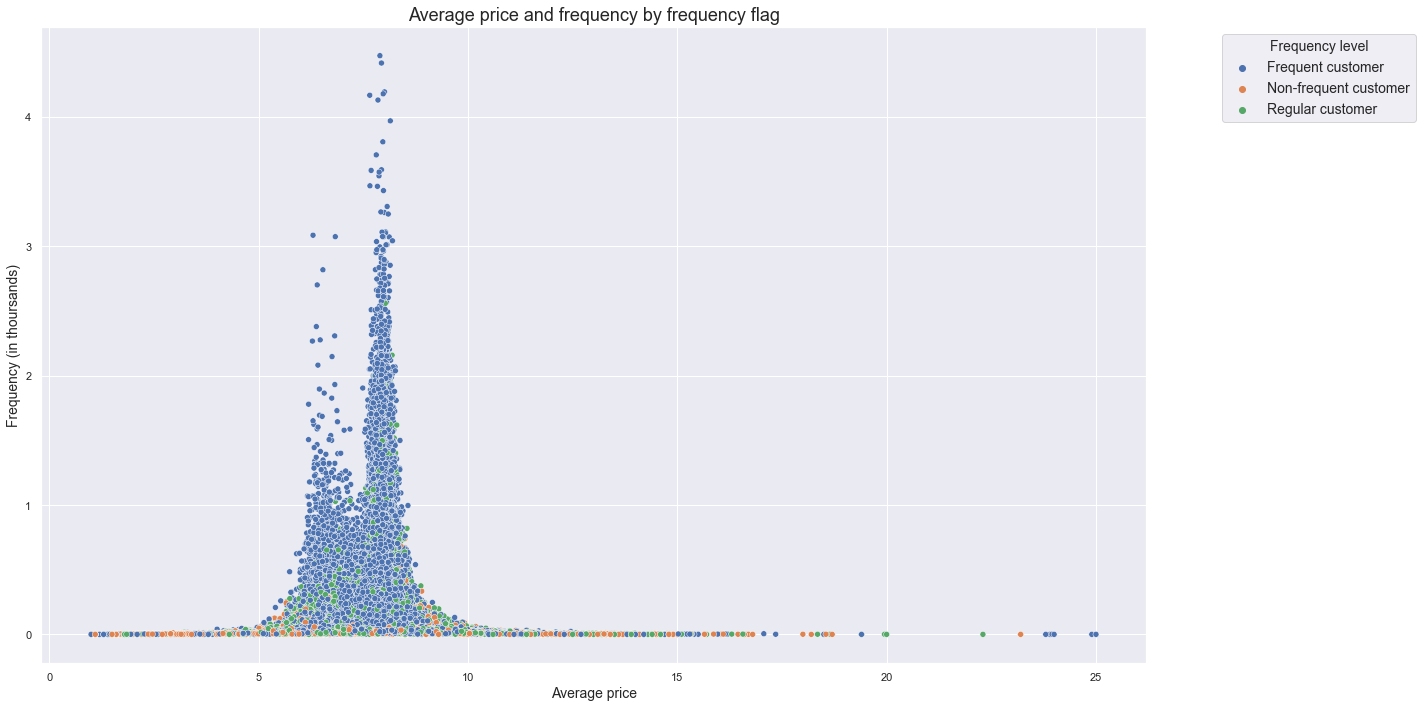

In [54]:
# scatterplot visualizing pattern in customer orders based on frequency and average price
scatter_freq_freq_price = sns.scatterplot(data = df_day_prof, x = 'avg_prices', y = 'frequency', hue = 'frequency_flag')
plt.legend(title = 'Frequency level', title_fontsize = 14, fontsize = 14, bbox_to_anchor = (1.25, 1.0))
plt.title('Average price and frequency by frequency flag', fontsize = 18)
plt.xlabel('Average price', fontsize = 14)
plt.ylabel('Frequency (in thoursands)', fontsize = 14)
sns.set(rc = {'figure.figsize' : (15,10)})
plt.tight_layout()
plt.subplots_adjust(right = 0.8)
plt.savefig(os.path.join(path, '4. Analysis', 'Visualization', '4.10 scatter_freq_price_frequency.png'))

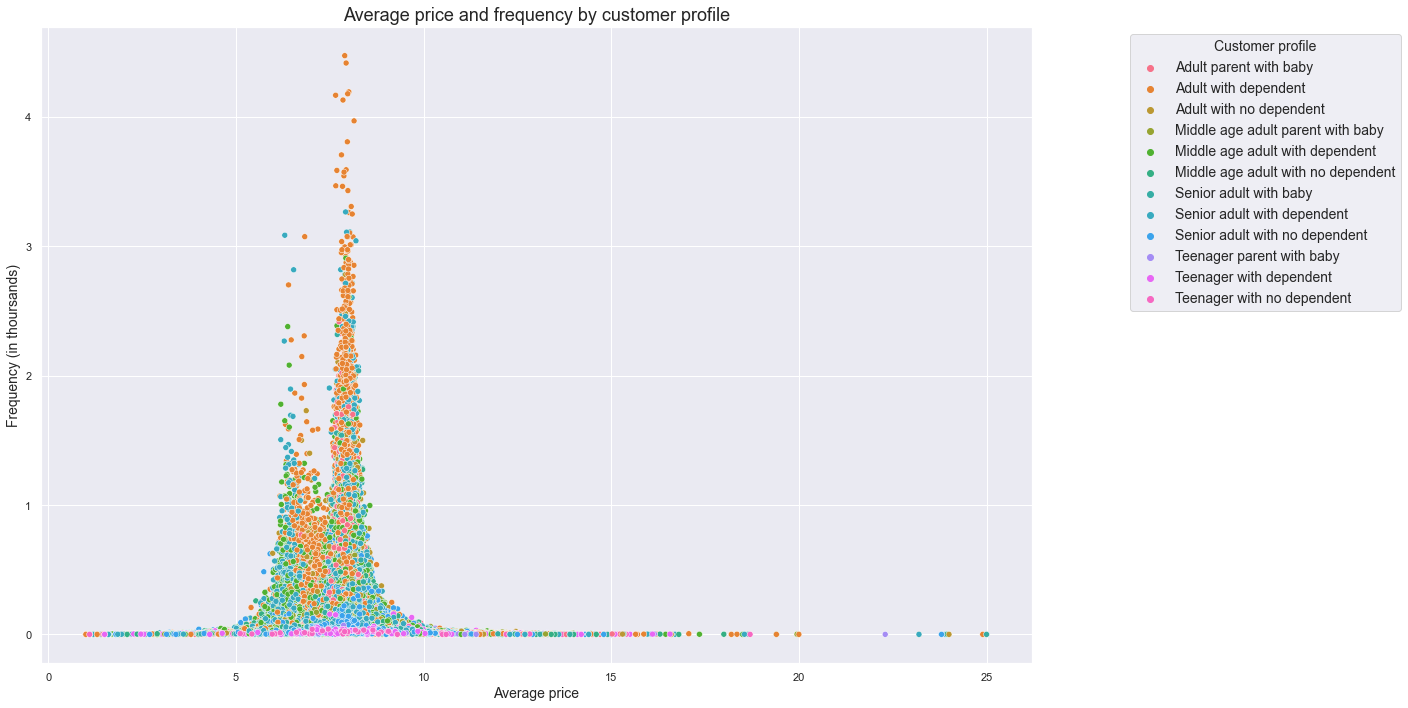

In [53]:
# scatterplot visualizing pattern in customer orders based on frequency and average price
scatter_prof_freq_price = sns.scatterplot(data = df_day_prof, x = 'avg_prices', y = 'frequency', hue = 'combined_customer_profile')
plt.legend(title = 'Customer profile', title_fontsize = 14, fontsize = 14, bbox_to_anchor = (1.38, 1.0))
plt.title('Average price and frequency by customer profile', fontsize = 18)
plt.xlabel('Average price', fontsize = 14)
plt.ylabel('Frequency (in thoursands)', fontsize = 14)
sns.set(rc = {'figure.figsize' : (20,10)})
plt.subplots_adjust(right = 0.85)
plt.tight_layout()
plt.savefig(os.path.join(path, '4. Analysis', 'Visualization', '4.10 scatter_prof_price_frequency.png'))

## Visualising distribution of loyalty flags among users

In [108]:
# creating new dataframe with required columns and agggregation
df_loyalty = df_final.groupby('loyalty_flag').agg({'user_id' : ['nunique']})
df_loyalty.columns = ['count_of_user_id']

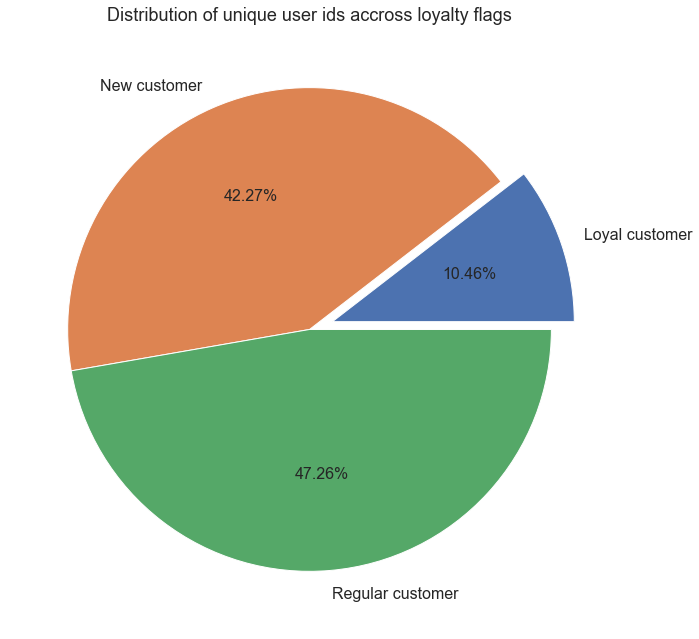

In [129]:
# creating pie chart visualizing distribution of loyalty flags among users
pie_loyalty_flag = df_loyalty.plot(kind = 'pie', y = 'count_of_user_id', ylabel = '', legend = False, autopct = '%0.2f%%', figsize = (10,10), fontsize = 16, explode = (0.10,0.0,0.0))
plt.title('Distribution of unique user ids accross loyalty flags', fontsize = 18)
plt.tight_layout()
plt.savefig(os.path.join(path, '4. Analysis', 'Visualization', '4.10 pie_loyalty.png'))